In [31]:
# Cell 1 - Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

print("libraries loaded!")


libraries loaded!


In [32]:
# Cell 2 - load data
# Using the Heart Diseases dataset from the UCI Machine Learning Repository
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

print("Dataset loaded")
print(f"Total rows: {len(df)}")
print(df.head())

Dataset loaded
Total rows: 303
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [33]:
# Cell 3 - check the data
print("Columns in dataset:")
print(df.columns.tolist())

# checking if any missing values
print("\nMissing values:")
print(df.isnull().sum())

# basic info
df.info()

Columns in dataset:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 

In [34]:
# Cell 4 - prepare gender column
# the sex column has 0 for female and 1 for male
# Making it easier to understand
df['gender'] = df['sex'].map({0: 'Female', 1: 'Male'})

print("Created gender column")
print(df[['sex', 'gender']].head(10))

Created gender column
   sex  gender
0    1    Male
1    1    Male
2    0  Female
3    1    Male
4    0  Female
5    1    Male
6    0  Female
7    1    Male
8    1    Male
9    1    Male


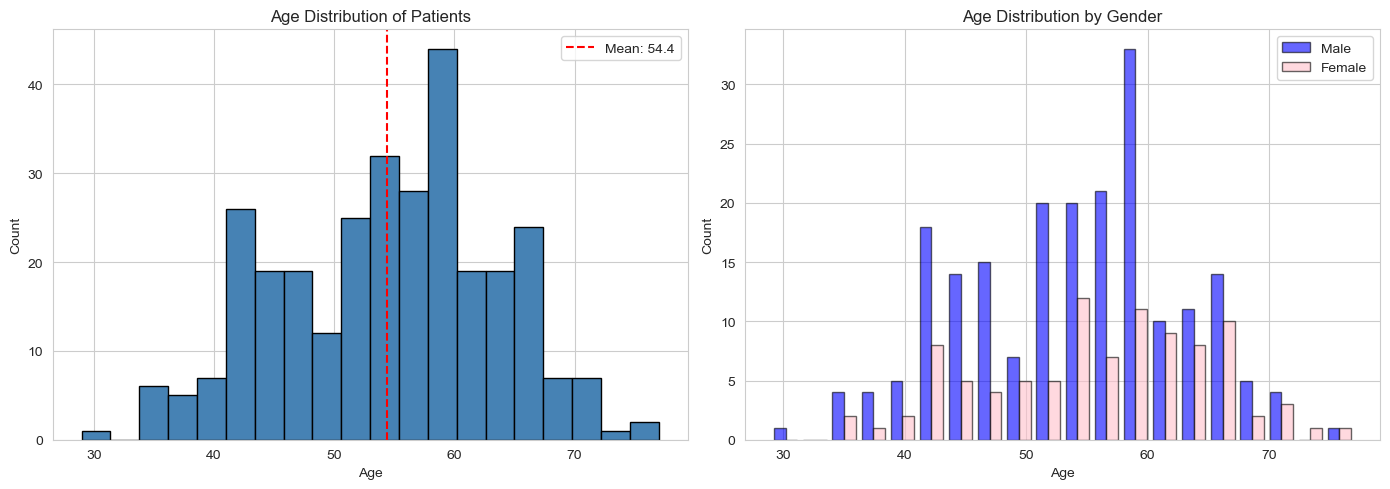

Youngest: 29
Oldest: 77
Average: 54.4


In [35]:
# Cell 5 - Age Distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# first plot - overall age distribution
ax1.hist(df['age'], bins=20, color='steelblue', edgecolor='black')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution of Patients')

# add mean line
mean_age = df['age'].mean()
ax1.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
ax1.legend()

# second plot - age by gender
males = df[df['gender'] == 'Male']['age']
females = df[df['gender'] == 'Female']['age']

ax2.hist([males, females], bins=20, label=['Male', 'Female'],
         color=['blue', 'pink'], edgecolor='black', alpha=0.6)
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')
ax2.set_title('Age Distribution by Gender')
ax2.legend()

plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300)
plt.show()

print(f"Youngest: {df['age'].min()}")
print(f"Oldest: {df['age'].max()}")
print(f"Average: {mean_age:.1f}")

In [ ]:
# Cell 6 - gender distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# simple count of males and females
gender_count = df['gender'].value_counts()

ax1.bar(gender_count.index, gender_count.values, 
        color=['blue', 'pink'], edgecolor='black')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.set_title('Gender Distribution')

# adding counts on bars
for i, v in enumerate(gender_count.values):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# gender vs heart disease
disease_gender = pd.crosstab(df['gender'], df['target'])
disease_gender.columns = ['No Disease', 'Has Disease']

x_pos = np.arange(len(disease_gender.index))
width = 0.35

ax2.bar(x_pos - width/2, disease_gender['No Disease'], width, 
        label='No Disease', color='lightgreen', edgecolor='black')
ax2.bar(x_pos + width/2, disease_gender['Has Disease'], width,
        label='Has Disease', color='salmon', edgecolor='black')

ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
ax2.set_title('Gender vs Heart Disease Status')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(disease_gender.index)
ax2.legend()

plt.tight_layout()
plt.savefig('gender_distribution.png', dpi=300)
plt.show()

male_pct = (gender_count['Male'] / len(df)) * 100
female_pct = (gender_count['Female'] / len(df)) * 100
print(f"Males: {gender_count['Male']} ({male_pct:.1f}%)")
print(f"Females: {gender_count['Female']} ({female_pct:.1f}%)")

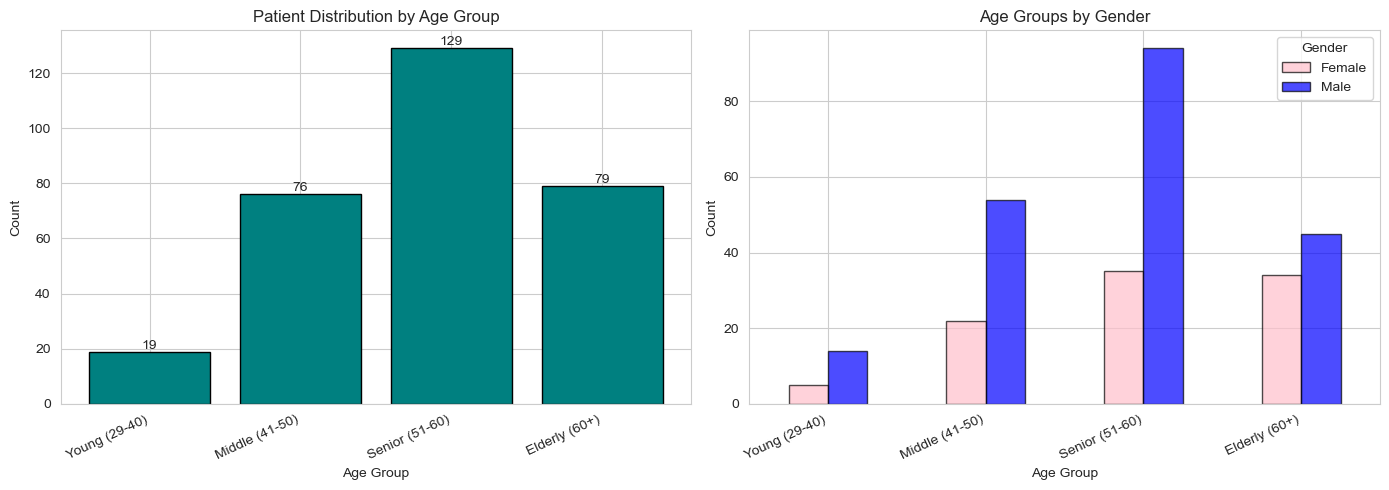

In [37]:
# Cell 7 - age groups
# creating age categories
df['age_group'] = pd.cut(df['age'], 
                          bins=[0, 40, 50, 60, 100],
                          labels=['Young (29-40)', 'Middle (41-50)', 
                                  'Senior (51-60)', 'Elderly (60+)'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# age group counts
age_grp = df['age_group'].value_counts().sort_index()

ax1.bar(range(len(age_grp)), age_grp.values, color='teal', edgecolor='black')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Count')
ax1.set_title('Patient Distribution by Age Group')
ax1.set_xticks(range(len(age_grp)))
ax1.set_xticklabels(age_grp.index, rotation=25, ha='right')

# add counts
for i, v in enumerate(age_grp.values):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# age group by gender
age_gender_cross = pd.crosstab(df['age_group'], df['gender'])
age_gender_cross.plot(kind='bar', ax=ax2, color=['pink', 'blue'], 
                       edgecolor='black', alpha=0.7)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.set_title('Age Groups by Gender')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha='right')
ax2.legend(title='Gender')

plt.tight_layout()
plt.savefig('age_groups.png', dpi=300)
plt.show()

In [38]:
# Cell 8 - summary stats
print("="*60)
print("SUMMARY STATISTICS")
print("="*60)

# gender stats
print("\nGender breakdown:")
male_count = len(df[df['gender'] == 'Male'])
female_count = len(df[df['gender'] == 'Female'])
print(f"Males: {male_count} ({male_count/len(df)*100:.1f}%)")
print(f"Females: {female_count} ({female_count/len(df)*100:.1f}%)")

# age stats
print("\nAge statistics:")
print(f"Min age: {df['age'].min()}")
print(f"Max age: {df['age'].max()}")
print(f"Mean age: {df['age'].mean():.2f}")
print(f"Median age: {df['age'].median()}")

# age by gender
print("\nAge by gender:")
print(df.groupby('gender')['age'].describe())

# heart disease stats
print("\nHeart disease breakdown:")
disease_count = df['target'].value_counts()
print(f"Healthy: {disease_count[0]} ({disease_count[0]/len(df)*100:.1f}%)")
print(f"Disease: {disease_count[1]} ({disease_count[1]/len(df)*100:.1f}%)")

# age groups
print("\nAge group distribution:")
print(df['age_group'].value_counts().sort_index())

print("\n" + "="*60)
print("All visualizations saved!")
print("Files: age_distribution.png, gender_distribution.png, age_groups.png")
print("="*60)

SUMMARY STATISTICS

Gender breakdown:
Males: 207 (68.3%)
Females: 96 (31.7%)

Age statistics:
Min age: 29
Max age: 77
Mean age: 54.37
Median age: 55.0

Age by gender:
        count       mean       std   min    25%   50%   75%   max
gender                                                           
Female   96.0  55.677083  9.409396  34.0  49.75  57.0  63.0  76.0
Male    207.0  53.758454  8.883803  29.0  47.00  54.0  59.5  77.0

Heart disease breakdown:
Healthy: 138 (45.5%)
Disease: 165 (54.5%)

Age group distribution:
age_group
Young (29-40)      19
Middle (41-50)     76
Senior (51-60)    129
Elderly (60+)      79
Name: count, dtype: int64

All visualizations saved!
Files: age_distribution.png, gender_distribution.png, age_groups.png
